In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

In [165]:
wine_data = pd.read_csv(f'../Chapter 4/tabular-wine/winequality-white.csv', delimiter = ';')
wine_data.shape

(4898, 12)

In [166]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [167]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [168]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [272]:
wine_data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

<Axes: >

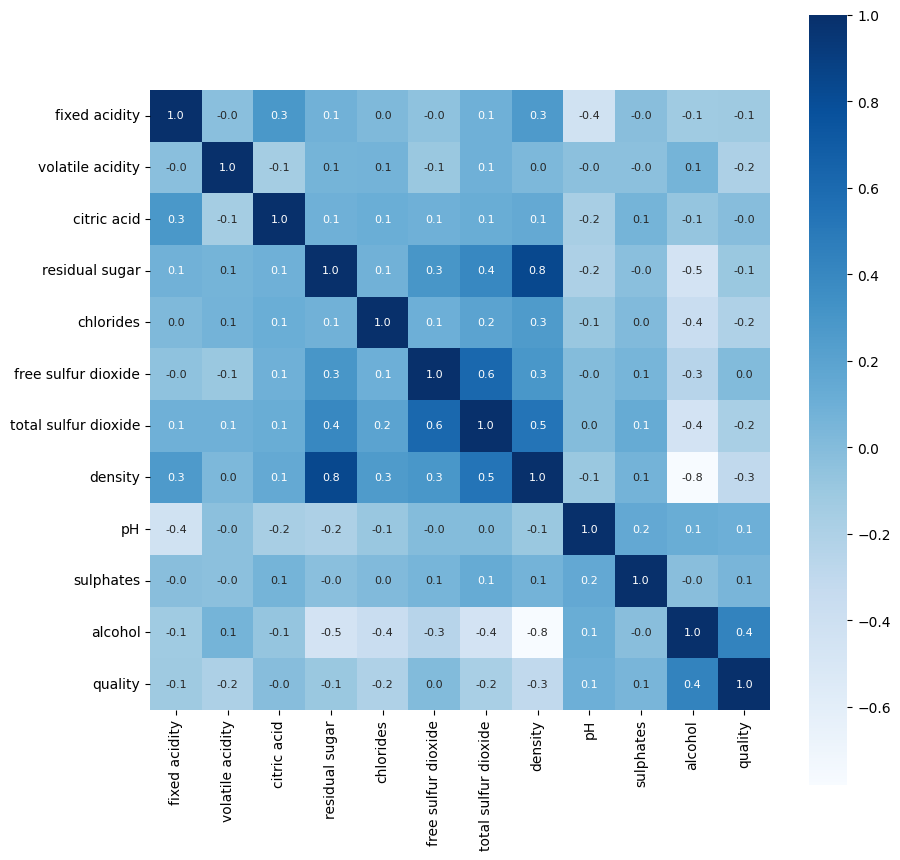

In [171]:
correlation = wine_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [172]:
wine_t = torch.tensor(wine_data.values, dtype = torch.float32)
wine_t.shape, wine_t.dtype

(torch.Size([4898, 12]), torch.float32)

In [173]:
X = wine_t[:, :-1]
X, X.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [174]:
y = wine_t[:, -1]
y, y.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [175]:
n_samples = X.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([3549, 4870, 2248,  ..., 3304,  516, 3279]),
 tensor([3571, 3421, 1677, 1378, 3317,  842, 3018, 1111, 1369, 4320, 3060,  333,
         3771, 4509, 3156, 3563,   57,  479, 2886, 2852, 2312, 3536,  378,   27,
         2024, 3144,  879, 3474, 3992, 4218, 1177, 1124, 3620, 3588, 1033, 2841,
          877, 4467, 3508, 3126, 2436, 3150, 4376,  610, 2190,  420, 3203, 4481,
         2279, 3003, 3486, 3339, 2050, 4413, 3320, 2967, 2710, 4788,  962, 1467,
         1470,  910, 4145, 3889, 1249, 4361, 3513,  134, 1533, 2537, 1416, 3779,
         4185, 3589, 3658, 1340, 1704, 2297, 3382,  861, 3258, 1885,  181, 4651,
         3515, 2873, 1804,  368,  488, 4592,  936, 1477,  532, 4197, 2827, 2238,
         3533, 2948, 4257, 3290, 4297,  452, 1185, 4405, 4360, 1426, 1202, 3656,
         2739, 1244,  193,  570, 4385, 4190,  403, 3691,  801, 3200, 3408,  694,
         2477, 2409, 1767, 2547, 4717, 1502, 4733, 4540, 1781, 3275, 1144, 4252,
          603,  406, 4816, 3972,  278, 2512,  856,  507,

In [258]:
X_train = X[train_indices]
X_test = X[val_indices]

y_train = y[train_indices].unsqueeze(1)
y_test = y[val_indices].unsqueeze(1)


In [259]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([3919, 11])
X_test shape: torch.Size([979, 11])
y_train shape: torch.Size([3919, 1])
y_test shape: torch.Size([979, 1])


In [261]:
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, y_train, X_test, y_test):
	for epoch in range(1, n_epochs + 1):
		train_pred = model(X_train)
		loss_train = loss_fn(train_pred, y_train)
		
		test_pred = model(X_test)
		loss_val = loss_fn(test_pred, y_test)
		
		optimizer.zero_grad()
		loss_train.backward()
		optimizer.step()

		if epoch == 1 or epoch % 1000 == 0:
			print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}," f" Validation loss {loss_val.item():.4f}")

In [269]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([('hidden_linear', nn.Linear(11,25)),
									   ('hidden_activation', nn.Tanh()),
									   ('output_linear', nn.Linear(25,1))]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=11, out_features=25, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=25, out_features=1, bias=True)
)

In [270]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-5)

training_loop(
	n_epochs = 20000,
	optimizer = optimizer,
	model = seq_model,
	loss_fn = nn.MSELoss(),
	X_train = X_train,
	y_train = y_train,
	X_test = X_test,
	y_test = y_test)

Epoch 1, Training loss 41.1591, Validation loss 41.4898
Epoch 1000, Training loss 14.2136, Validation loss 14.3807
Epoch 2000, Training loss 5.5158, Validation loss 5.6082
Epoch 3000, Training loss 2.4518, Validation loss 2.5088
Epoch 4000, Training loss 1.3714, Validation loss 1.4094
Epoch 5000, Training loss 0.9891, Validation loss 1.0156
Epoch 6000, Training loss 0.8534, Validation loss 0.8735
Epoch 7000, Training loss 0.8053, Validation loss 0.8215
Epoch 8000, Training loss 0.7882, Validation loss 0.8021
Epoch 9000, Training loss 0.7820, Validation loss 0.7947
Epoch 10000, Training loss 0.7798, Validation loss 0.7916
Epoch 11000, Training loss 0.7788, Validation loss 0.7903
Epoch 12000, Training loss 0.7783, Validation loss 0.7894
Epoch 13000, Training loss 0.7777, Validation loss 0.7882
Epoch 14000, Training loss 0.7767, Validation loss 0.7865
Epoch 15000, Training loss 0.7753, Validation loss 0.7846
Epoch 16000, Training loss 0.7637, Validation loss 0.7649
Epoch 17000, Training l

In [271]:
import numpy as np

test_indices = wine_data.sample(15)
test_indices['Predicted']=seq_model(torch.tensor(np.array(test_indices.iloc[:,:-1].values,dtype=np.float32).reshape(15,11)))\
									.detach()\
									.numpy()\
									.reshape(15,1)\
									.round(2)
test_indices.iloc[:,-2:]

,quality,Predicted
1395,7,5.99
374,7,5.99
3292,5,5.46
3550,6,5.89
578,7,5.98
788,7,5.96
1094,5,5.56
3323,6,5.98
4585,6,5.96
1934,6,5.98
